/Users/kendallgilbert/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



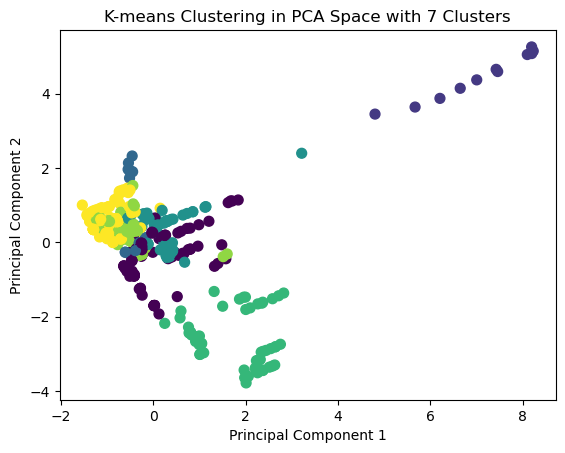

In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot

# Load the data
data = pd.read_csv("/Users/kendallgilbert/dsan-5000-project-kendallgilbert180/dsan-website/5000-website/data/01-modified-data/nb_record.csv")

# Encode the 'Country' column
label_encoder = LabelEncoder()
data['Country'] = label_encoder.fit_transform(data['Country'])

# Select features to standardize / Standarize
features_to_standardize = ['Aqua Production (Millions)', 'Marine Protected Area (sqkm)', 'Inventions (number)', 'Instruments (number)', 'Fishing Exports (Millions)', 'Value', 'Country']
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data[features_to_standardize])
data_standardized = pd.DataFrame(data_standardized, columns=features_to_standardize)

# Apply PCA on the standardized data
pca = PCA(n_components=3) 
reduced_data = pca.fit_transform(data_standardized)
data_standardized['PCA1'] = reduced_data[:, 0]
data_standardized['PCA2'] = reduced_data[:, 1]

# Performing K-means clustering on the reduced data
kmeans_pca = KMeans(n_clusters=7, random_state=42)
kmeans_pca.fit(reduced_data)
data_standardized['cluster_number_pca'] = kmeans_pca.labels_

# Visualize clusters in the reduced space using matplotlib
plt.scatter(data_standardized['PCA1'], data_standardized['PCA2'], c=data_standardized['cluster_number_pca'], cmap='viridis', marker='o', s=50)
plt.title('K-means Clustering in PCA Space with 7 Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Assuming 'Country' is the column containing country information in your DataFrame
hover_data = data_standardized[['Country']]

data_standardized['Country'] = data_standardized['Country'].apply(lambda x: f'{x:.3f}')


fig = px.scatter(data_standardized, x='PCA1', y='PCA2', color='cluster_number_pca', hover_data=hover_data,
                 labels={'cluster_number_pca': 'Cluster Number', 'PCA1': 'Principal Component 1', 'PCA2': 'Principal Component 2'})

fig.update_layout(title='K-means Clustering in PCA Space with 7 Clusters', xaxis_title='Principal Component 1', yaxis_title='Principal Component 2')
fig.show()

/Users/kendallgilbert/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Text(0, 0.5, 'Principal Component 2')

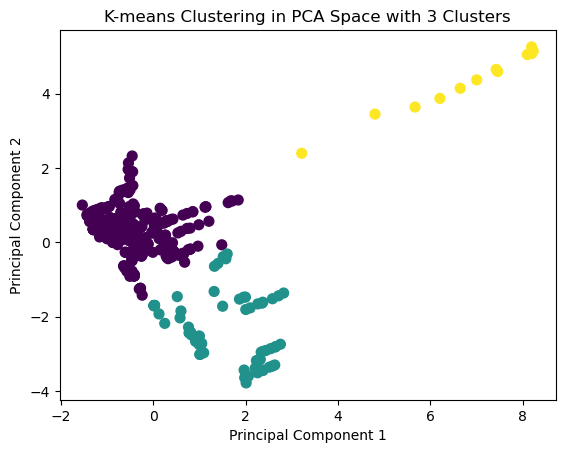

In [43]:
# Performing K-means clustering on the reduced data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(reduced_data)
data_standardized['cluster_number_pca'] = kmeans_pca.labels_

# Visualize clusters in the reduced space
plt.scatter(data_standardized['PCA1'], data_standardized['PCA2'], c=data_standardized['cluster_number_pca'], cmap='viridis', marker='o', s=50)
plt.title('K-means Clustering in PCA Space with 3 Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

In [42]:
# Assuming 'Country' is the column containing country information in your DataFrame
hover_data = data_standardized[['Country']]

fig = px.scatter(data_standardized, x='PCA1', y='PCA2', color='cluster_number_pca', hover_data=hover_data,
                 labels={'cluster_number_pca': 'Cluster Number', 'PCA1': 'Principal Component 1', 'PCA2': 'Principal Component 2'})

fig.update_layout(title='K-means Clustering in PCA Space with 3 Clusters', xaxis_title='Principal Component 1', yaxis_title='Principal Component 2')
fig.show()